In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#the data contains details about house rents of different cities and factors such as floor, size, bathrooms,etc.
data = pd.read_csv('/content/House_Rent_Dataset.csv')

In [3]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
data_one_hot = pd.get_dummies(data)
data_one_hot = data_one_hot.astype('float32')
data_one_hot.head()

,BHK,Rent,Size,Bathroom,Posted On_2022-04-13,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,10000.0,1100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,20000.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,17000.0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,10000.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,7500.0,850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
X = data_one_hot.drop('Rent', axis=1)
y = data_one_hot['Rent']


In [6]:
X.head()

,BHK,Size,Bathroom,Posted On_2022-04-13,Posted On_2022-04-23,Posted On_2022-04-24,Posted On_2022-04-25,Posted On_2022-04-26,Posted On_2022-04-27,Posted On_2022-04-28,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2.0,1100.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2.0,1000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,800.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,2.0,850.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [7]:
y.head()

,Rent
0,10000.0
1,20000.0
2,17000.0
3,10000.0
4,7500.0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=92)

Tensorflow **tf.callbacks.earlyStopping()** is a callback function used for stopping training when training data stop improving.

Syntax:

tf.callbacks.earlyStopping(args);

**What is Early Stopping?**

Early stopping is a form of regularization that halts the training process when the performance of the model on a validation dataset starts to degrade. Instead of training the model until convergence, early stopping monitors the validation error during training and stops the training process when the validation error begins to increase.

In [9]:
#creating model

tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(70, activation= 'leaky_relu'),
    tf.keras.layers.Dense(70, activation= 'leaky_relu'),
    tf.keras.layers.Dense(14, activation= 'leaky_relu'),
    tf.keras.layers.Dense(1, activation ='relu')
])

In [10]:
model.compile( loss = tf.keras.losses.MeanSquaredLogarithmicError(),
              optimizer = tf.keras.optimizers.Lion(
    learning_rate=0.001),
               metrics = ['mae']
              )

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, epochs=100, callbacks=[early_stopping])

Epoch 1/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 35.6994 - mae: 35494.6133
Epoch 2/100
 66/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4072 - mae: 29115.2969

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mae
  current = self.get_monitor_value(logs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9596 - mae: 27586.1465
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3243 - mae: 63109.3203
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4632 - mae: 66749.9219
Epoch 5/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8980 - mae: 23446.1270
Epoch 6/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7358 - mae: 24830.4219
Epoch 7/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6643 - mae: 23111.7012
Epoch 8/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6361 - mae: 22938.4434
Epoch 9/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5820 - mae: 22520.0215
Epoch 10/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5055 - mae: 21750.9160
Epoch 11/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4424 - mae: 20889.3984
Epoch 12/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3796 - mae: 19858.0527
Epoch 13/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0

In [12]:
model.evaluate(X_test, y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1826 - mae: 10160.1709 


[0.2153720110654831, 14022.283203125]

In [13]:
training_results = model.fit(X_train, y_train, epochs =100, verbose = 0, validation_data=(X_test, y_test))

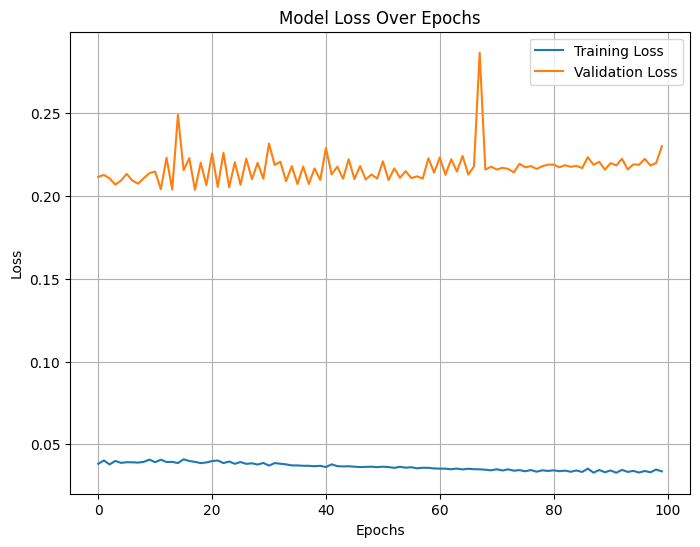

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(training_results.history['loss'], label='Training Loss')
plt.plot(training_results.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()